In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:/Users/croatia/Desktop/OI_Evidencija_03022022.xlsx')

In [3]:
df = df.drop(['Unnamed: 1','Unnamed: 3','Unnamed: 5','Ukupno','Prosjek','Ukupno kolokviji','Bonus predavanja','Broj položenih kvizova',
        'Bodovi s kvizova','Infomacijska sigurnost','potpis','Upis ocjene'],axis=1)

In [4]:
df.head()

,Word,Power Point,Excel,Bonus,Test iz teorije 1,Test iz teorije 2,Bonus teorija,Bonus kviz,Ukupno.1
0,15,5,17.0,5.0,12,16.0,5.0,4.0,93.0
1,15,4,20.0,5.0,9,16.0,5.0,2.0,90.5
2,10,5,18.0,5.0,10,17.0,5.0,4.0,89.5
3,15,5,17.0,5.0,10,12.0,5.0,4.0,86.0
4,15,4,20.0,5.0,9,10.0,5.0,5.0,84.5


In [5]:
def prolazak(bodovi):
    prolaz = []
    for i in bodovi:
        if i >= 60:
            prolaz.append(1)
        else:
            prolaz.append(0)
    return prolaz

In [6]:
df['Prolazak'] = prolazak(df['Ukupno.1'])

In [7]:
def ocijena(bodovi):
    ocijena = []
    for i in bodovi:
        if ((i >= 60) & (i <70)):
            ocijena.append(2)
        elif ((i >= 70) & (i <80)):
            ocijena.append(3)
        elif ((i >= 80) & (i <90)):
            ocijena.append(4)
        elif i >= 90:
              ocijena.append(5)
        else:
              ocijena.append(1)
    return ocijena

In [8]:
df['Ocijena'] = ocijena(df['Ukupno.1'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Word               200 non-null    object 
 1   Power Point        200 non-null    object 
 2   Excel              111 non-null    float64
 3   Bonus              215 non-null    float64
 4   Test iz teorije 1  215 non-null    object 
 5   Test iz teorije 2  113 non-null    float64
 6   Bonus teorija      138 non-null    float64
 7   Bonus kviz         102 non-null    float64
 8   Ukupno.1           215 non-null    float64
 9   Prolazak           224 non-null    int64  
 10  Ocijena            224 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 19.4+ KB


In [10]:
df.Word.value_counts()

      70
15    42
14    23
13    20
10    11
0      9
11     8
12     5
8      4
9      3
4      2
6      2
3      1
Name: Word, dtype: int64

In [11]:
df.Word = df.Word.replace(' ',0)

In [12]:
df.Word = df.Word.fillna(0)

In [13]:
df['Power Point'] = df['Power Point'].replace(' ',0)
df['Power Point'] = df['Power Point'].fillna(0)

In [14]:
df['Excel'] = df['Excel'].replace(' ',0)
df['Excel'] = df['Excel'].fillna(0)

In [15]:
for i in df.columns:
    df[i].replace(' ',0,inplace=True)
    df[i].fillna(0,inplace=True)

In [16]:
df

,Word,Power Point,Excel,Bonus,Test iz teorije 1,Test iz teorije 2,Bonus teorija,Bonus kviz,Ukupno.1,Prolazak,Ocijena
0,15.0,5.0,17.0,5.0,12.0,16.0,5.0,4.0,93.0,1,5
1,15.0,4.0,20.0,5.0,9.0,16.0,5.0,2.0,90.5,1,5
2,10.0,5.0,18.0,5.0,10.0,17.0,5.0,4.0,89.5,1,4
3,15.0,5.0,17.0,5.0,10.0,12.0,5.0,4.0,86.0,1,4
4,15.0,4.0,20.0,5.0,9.0,10.0,5.0,5.0,84.5,1,4
...,...,...,...,...,...,...,...,...,...,...,...
219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

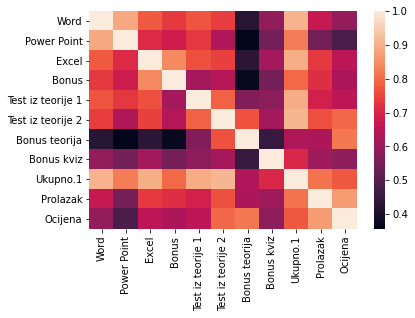

In [18]:
sns.heatmap(df.corr())

In [19]:
#TRI KLASIFIKACIJE, JEDNA REGRESIJA, JEDNA BINARNA KLASIFIKACIJA, DRUGA MULTI CLASS KLASIFIKACIJA

<AxesSubplot:xlabel='Ocijena', ylabel='count'>

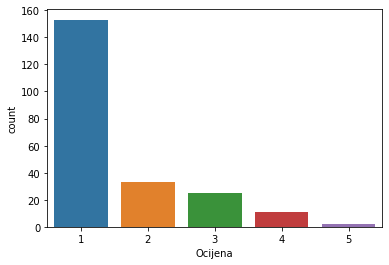

In [20]:
sns.countplot(df.Ocijena)

In [21]:
df.head(2)

,Word,Power Point,Excel,Bonus,Test iz teorije 1,Test iz teorije 2,Bonus teorija,Bonus kviz,Ukupno.1,Prolazak,Ocijena
0,15.0,5.0,17.0,5.0,12.0,16.0,5.0,4.0,93.0,1,5
1,15.0,4.0,20.0,5.0,9.0,16.0,5.0,2.0,90.5,1,5


In [22]:
df = df.iloc[:-50]

In [23]:
#REGRESIJA

X = df.drop(['Ukupno.1','Prolazak','Ocijena','Test iz teorije 1','Test iz teorije 2'],axis=1).values
y = df['Ukupno.1'].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train.shape

(139, 6)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
# STVARANJE REGRESIJSKOG MODELA

In [32]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [33]:
model.fit(x=X_train,y=y_train,epochs = 200,validation_data=(X_test,y_test))

Epoch 1/200
5/5 [==============================] - 1s 48ms/step - loss: 42.3256 - val_loss: 45.1938
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 42.2539 - val_loss: 45.1176
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 42.1813 - val_loss: 45.0344
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 42.1070 - val_loss: 44.9440
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 42.0182 - val_loss: 44.8450
Epoch 6/200
5/5 [==============================] - 0s 9ms/step - loss: 41.9281 - val_loss: 44.7318
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 41.8257 - val_loss: 44.6069
Epoch 8/200
5/5 [==============================] - 0s 9ms/step - loss: 41.7104 - val_loss: 44.4671
Epoch 9/200
5/5 [==============================] - 0s 11ms/step - loss: 41.5775 - val_loss: 44.3068
Epoch 10/200
5/5 [==============================] - 0s 10ms/step - loss: 41.4218 - val_loss: 44.1206
Epo

Epoch 84/200
5/5 [==============================] - 0s 8ms/step - loss: 4.1461 - val_loss: 4.4878
Epoch 85/200
5/5 [==============================] - 0s 8ms/step - loss: 4.1734 - val_loss: 4.4929
Epoch 86/200
5/5 [==============================] - 0s 9ms/step - loss: 4.1797 - val_loss: 4.4455
Epoch 87/200
5/5 [==============================] - 0s 9ms/step - loss: 4.1362 - val_loss: 4.4097
Epoch 88/200
5/5 [==============================] - 0s 8ms/step - loss: 4.0928 - val_loss: 4.3858
Epoch 89/200
5/5 [==============================] - 0s 9ms/step - loss: 4.0966 - val_loss: 4.3559
Epoch 90/200
5/5 [==============================] - 0s 9ms/step - loss: 4.1351 - val_loss: 4.3330
Epoch 91/200
5/5 [==============================] - 0s 9ms/step - loss: 4.1620 - val_loss: 4.3253
Epoch 92/200
5/5 [==============================] - 0s 8ms/step - loss: 4.0784 - val_loss: 4.3105
Epoch 93/200
5/5 [==============================] - 0s 9ms/step - loss: 4.0556 - val_loss: 4.2883
Epoch 94/200
5/5 [==

Epoch 167/200
5/5 [==============================] - 0s 9ms/step - loss: 3.7348 - val_loss: 3.5996
Epoch 168/200
5/5 [==============================] - 0s 8ms/step - loss: 3.7107 - val_loss: 3.5956
Epoch 169/200
5/5 [==============================] - 0s 8ms/step - loss: 3.7226 - val_loss: 3.6024
Epoch 170/200
5/5 [==============================] - 0s 8ms/step - loss: 3.7206 - val_loss: 3.6038
Epoch 171/200
5/5 [==============================] - 0s 9ms/step - loss: 3.7148 - val_loss: 3.5936
Epoch 172/200
5/5 [==============================] - 0s 8ms/step - loss: 3.7026 - val_loss: 3.5803
Epoch 173/200
5/5 [==============================] - 0s 9ms/step - loss: 3.7146 - val_loss: 3.5764
Epoch 174/200
5/5 [==============================] - 0s 9ms/step - loss: 3.7322 - val_loss: 3.6094
Epoch 175/200
5/5 [==============================] - 0s 9ms/step - loss: 3.7150 - val_loss: 3.6093
Epoch 176/200
5/5 [==============================] - 0s 10ms/step - loss: 3.7222 - val_loss: 3.6138
Epoch 177

In [34]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

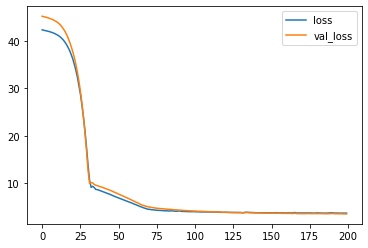

In [35]:
losses.plot()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [37]:
predictions = model.predict(X_test)

In [38]:
# MODEL RADI POPRILICNO DOBRO, SA PROSJECNOM GRESKOM OD 3,5

In [39]:
print(mean_absolute_error(y_test,predictions))

3.5264157427208764


In [40]:
df['Ukupno.1'].describe()

count    174.000000
mean      42.931034
std       30.370370
min        0.000000
25%        3.000000
50%       53.250000
75%       67.375000
max       93.000000
Name: Ukupno.1, dtype: float64

In [42]:
print(explained_variance_score(y_test,predictions))

0.966792979649029


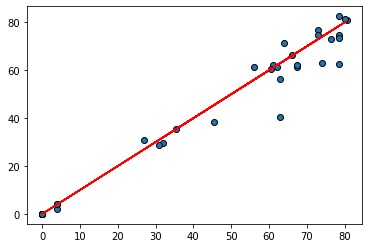

In [43]:
plt.scatter(y_test,predictions,edgecolor='black')
plt.plot(y_test,y_test,'r')

In [44]:
df.head(1)

,Word,Power Point,Excel,Bonus,Test iz teorije 1,Test iz teorije 2,Bonus teorija,Bonus kviz,Ukupno.1,Prolazak,Ocijena
0,15.0,5.0,17.0,5.0,12.0,16.0,5.0,4.0,93.0,1,5


In [45]:
# TESTIRAM MODEL NA NEKOLIKO OSOBA IZ SETA PODATAKA

In [46]:
osoba_1 = df.drop(['Ukupno.1','Prolazak','Ocijena','Test iz teorije 1','Test iz teorije 2'],axis=1).iloc[8]

In [47]:
osoba_1 = scaler.transform(osoba_1.values.reshape(1,-1))

In [48]:
model.predict(osoba_1)

array([[73.49161]], dtype=float32)

In [49]:
df.iloc[8]

Word                 14.0
Power Point           5.0
Excel                13.0
Bonus                 5.0
Test iz teorije 1     9.0
Test iz teorije 2    15.0
Bonus teorija         5.0
Bonus kviz            1.0
Ukupno.1             81.0
Prolazak              1.0
Ocijena               4.0
Name: 8, dtype: float64

In [50]:
# ZA OSOBU 1 SMO PREDVIDILI DA CE IMATI 73 BODA, DOK U STVARNOSTI IMA 81 BOD, SA SREDNJOM APSOLUTNOM POGRESKOM OD 3,5

In [51]:
osoba_2 = np.array([10,5,9,0,5,2])

In [52]:
osoba_2 = scaler.transform(osoba_2.reshape(1,-1))

In [53]:
model.predict(osoba_2)

array([[61.41707]], dtype=float32)

In [54]:
osoba_3 = df.drop(['Ukupno.1','Prolazak','Ocijena','Test iz teorije 1','Test iz teorije 2'],axis=1).iloc[20]

In [55]:
df.iloc[20]

Word                 14.0
Power Point           5.0
Excel                20.0
Bonus                 5.0
Test iz teorije 1    11.0
Test iz teorije 2     7.0
Bonus teorija         0.0
Bonus kviz            5.0
Ukupno.1             78.0
Prolazak              1.0
Ocijena               3.0
Name: 20, dtype: float64

In [ ]:
# TRECA OSOBA JE PROSLA MNOGO BOLJE. PREDVIDILI SMO 73 U USPOREDBI SA STVARNIH 78

In [56]:
osoba_3 = scaler.transform(osoba_3.values.reshape(1,-1))

In [57]:
model.predict(osoba_3)

array([[73.83807]], dtype=float32)

In [58]:
# MULTI CLASS CLASSIFICATION

In [59]:
df.head()

,Word,Power Point,Excel,Bonus,Test iz teorije 1,Test iz teorije 2,Bonus teorija,Bonus kviz,Ukupno.1,Prolazak,Ocijena
0,15.0,5.0,17.0,5.0,12.0,16.0,5.0,4.0,93.0,1,5
1,15.0,4.0,20.0,5.0,9.0,16.0,5.0,2.0,90.5,1,5
2,10.0,5.0,18.0,5.0,10.0,17.0,5.0,4.0,89.5,1,4
3,15.0,5.0,17.0,5.0,10.0,12.0,5.0,4.0,86.0,1,4
4,15.0,4.0,20.0,5.0,9.0,10.0,5.0,5.0,84.5,1,4


In [60]:
X = df.drop(['Ukupno.1','Prolazak','Ocijena','Test iz teorije 1','Test iz teorije 2'],axis=1).values
y = df['Ocijena'].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

In [62]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
from tensorflow.keras.layers import Dropout

In [64]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(30,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam')

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
early_stop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          verbose=1,
                          patience=10)

In [67]:
model.fit(x=X_train,y=y_train,epochs=500,
          validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/500
5/5 [==============================] - 1s 36ms/step - loss: 1.7844 - val_loss: 1.7940
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 1.7895 - val_loss: 1.7851
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 1.7630 - val_loss: 1.7758
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 1.7609 - val_loss: 1.7666
Epoch 5/500
5/5 [==============================] - 0s 8ms/step - loss: 1.7575 - val_loss: 1.7564
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 1.7421 - val_loss: 1.7459
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 1.7283 - val_loss: 1.7342
Epoch 8/500
5/5 [==============================] - 0s 9ms/step - loss: 1.7104 - val_loss: 1.7218
Epoch 9/500
5/5 [==============================] - 0s 8ms/step - loss: 1.7013 - val_loss: 1.7089
Epoch 10/500
5/5 [==============================] - 0s 10ms/step - loss: 1.6721 - val_loss: 1.6947
Epoch 11/500
5/5 [=========

5/5 [==============================] - 0s 8ms/step - loss: 0.8546 - val_loss: 1.0097
Epoch 85/500
5/5 [==============================] - 0s 8ms/step - loss: 0.8726 - val_loss: 1.0062
Epoch 86/500
5/5 [==============================] - 0s 8ms/step - loss: 0.9153 - val_loss: 1.0032
Epoch 87/500
5/5 [==============================] - 0s 8ms/step - loss: 0.9064 - val_loss: 0.9999
Epoch 88/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7822 - val_loss: 0.9967
Epoch 89/500
5/5 [==============================] - 0s 9ms/step - loss: 0.8103 - val_loss: 0.9933
Epoch 90/500
5/5 [==============================] - 0s 8ms/step - loss: 0.8120 - val_loss: 0.9904
Epoch 91/500
5/5 [==============================] - 0s 8ms/step - loss: 0.8156 - val_loss: 0.9875
Epoch 92/500
5/5 [==============================] - 0s 9ms/step - loss: 0.8261 - val_loss: 0.9850
Epoch 93/500
5/5 [==============================] - 0s 9ms/step - loss: 0.8542 - val_loss: 0.9828
Epoch 94/500
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.6311 - val_loss: 0.8969
Epoch 168/500
5/5 [==============================] - 0s 8ms/step - loss: 0.7143 - val_loss: 0.8957
Epoch 169/500
5/5 [==============================] - 0s 8ms/step - loss: 0.7174 - val_loss: 0.8950
Epoch 170/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6732 - val_loss: 0.8948
Epoch 171/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6503 - val_loss: 0.8947
Epoch 172/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6129 - val_loss: 0.8956
Epoch 173/500
5/5 [==============================] - 0s 8ms/step - loss: 0.6504 - val_loss: 0.8966
Epoch 174/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6932 - val_loss: 0.8961
Epoch 175/500
5/5 [==============================] - 0s 8ms/step - loss: 0.6488 - val_loss: 0.8950
Epoch 176/500
5/5 [==============================] - 0s 8ms/step - loss: 0.6735 - val_loss: 0.8941
Epoch 177/500
5/5 [=====

In [68]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

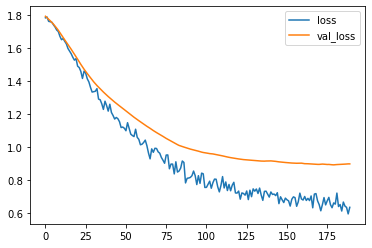

In [69]:
model_loss.plot()

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
pred = model.predict(X_test)
classes = np.argmax(pred,axis=1)

In [72]:
print(classification_report(y_test,classes))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        19
           2       1.00      0.29      0.44         7
           3       0.22      0.67      0.33         3
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2

    accuracy                           0.66        35
   macro avg       0.40      0.39      0.33        35
weighted avg       0.65      0.66      0.60        35



In [73]:
print(confusion_matrix(y_test,classes))

[[19  0  0  0  0]
 [ 4  2  1  0  0]
 [ 1  0  2  0  0]
 [ 0  0  4  0  0]
 [ 0  0  2  0  0]]


In [ ]:
# MULTI CLASS KLASIFIKACIJA JE PROSLA MNOGO LOSIJE

In [74]:
# POKUSAJ BALANSIRANJA PODATAKA OCIJENE

In [75]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [76]:
oversample = SMOTE()

In [77]:
X_smote,y_smote = oversample.fit_resample(X,y)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 6

In [78]:
df.Ocijena.value_counts()

1    103
2     33
3     25
4     11
5      2
Name: Ocijena, dtype: int64

In [79]:
#NIJE MOGUCE IZBALANSIRATI JER IMAMO MALO VRIJEDNOSTI ZA OCIJENU 5

In [80]:
# BINARY CLASSIFICATION

X = df.drop(['Ukupno.1','Prolazak','Ocijena','Test iz teorije 1','Test iz teorije 2'],axis=1).values
y = df['Prolazak'].values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)

In [82]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.3))

#BINARY CLASSIFICATION
#binary class triba bit sigmoid za aktivaciju, viditi teoriju za ovo
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [84]:
early_stop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          verbose=1,
                          patience=25)

In [85]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
5/5 [==============================] - 1s 53ms/step - loss: 0.7235 - val_loss: 0.7103
Epoch 2/600
5/5 [==============================] - 0s 9ms/step - loss: 0.7114 - val_loss: 0.7043
Epoch 3/600
5/5 [==============================] - 0s 10ms/step - loss: 0.7059 - val_loss: 0.6983
Epoch 4/600
5/5 [==============================] - 0s 11ms/step - loss: 0.6946 - val_loss: 0.6929
Epoch 5/600
5/5 [==============================] - 0s 9ms/step - loss: 0.6970 - val_loss: 0.6875
Epoch 6/600
5/5 [==============================] - 0s 11ms/step - loss: 0.6886 - val_loss: 0.6818
Epoch 7/600
5/5 [==============================] - 0s 10ms/step - loss: 0.6812 - val_loss: 0.6758
Epoch 8/600
5/5 [==============================] - 0s 10ms/step - loss: 0.6766 - val_loss: 0.6695
Epoch 9/600
5/5 [==============================] - 0s 10ms/step - loss: 0.6679 - val_loss: 0.6625
Epoch 10/600
5/5 [==============================] - 0s 10ms/step - loss: 0.6618 - val_loss: 0.6548
Epoch 11/600
5/5 [===

5/5 [==============================] - 0s 10ms/step - loss: 0.2895 - val_loss: 0.2713
Epoch 85/600
5/5 [==============================] - 0s 8ms/step - loss: 0.3009 - val_loss: 0.2699
Epoch 86/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2734 - val_loss: 0.2708
Epoch 87/600
5/5 [==============================] - 0s 10ms/step - loss: 0.2740 - val_loss: 0.2770
Epoch 88/600
5/5 [==============================] - 0s 8ms/step - loss: 0.3058 - val_loss: 0.2789
Epoch 89/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2994 - val_loss: 0.2781
Epoch 90/600
5/5 [==============================] - 0s 10ms/step - loss: 0.2700 - val_loss: 0.2710
Epoch 91/600
5/5 [==============================] - 0s 10ms/step - loss: 0.2550 - val_loss: 0.2679
Epoch 92/600
5/5 [==============================] - 0s 8ms/step - loss: 0.2803 - val_loss: 0.2644
Epoch 93/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2433 - val_loss: 0.2649
Epoch 94/600
5/5 [===========

5/5 [==============================] - 0s 10ms/step - loss: 0.2503 - val_loss: 0.2483
Epoch 167/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2432 - val_loss: 0.2515
Epoch 168/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2376 - val_loss: 0.2525
Epoch 169/600
5/5 [==============================] - 0s 10ms/step - loss: 0.2307 - val_loss: 0.2483
Epoch 170/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2759 - val_loss: 0.2437
Epoch 171/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2214 - val_loss: 0.2372
Epoch 172/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2662 - val_loss: 0.2306
Epoch 173/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2407 - val_loss: 0.2314
Epoch 174/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2511 - val_loss: 0.2383
Epoch 175/600
5/5 [==============================] - 0s 9ms/step - loss: 0.2204 - val_loss: 0.2432
Epoch 176/600
5/5 [===

In [86]:
model_loss_binary = pd.DataFrame(model.history.history)

<AxesSubplot:>

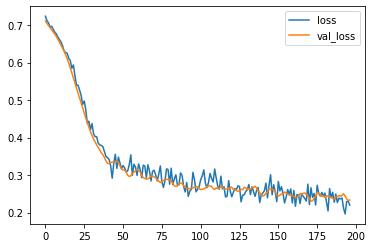

In [87]:
model_loss_binary.plot()

In [88]:
pred_binary = (model.predict(X_test)>0.5).astype('int32') 

In [ ]:
# BINARY KLASIFIKACIJA JE PROSLA JAKO DOBRO S F1 OD 92%

In [89]:
print(classification_report(y_test,pred_binary))
print(' ')
print(confusion_matrix(y_test,pred_binary))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.82      1.00      0.90        14

    accuracy                           0.91        35
   macro avg       0.91      0.93      0.91        35
weighted avg       0.93      0.91      0.92        35

 
[[18  3]
 [ 0 14]]


In [90]:
osoba_4 = df.drop(['Ukupno.1','Prolazak','Ocijena','Test iz teorije 1','Test iz teorije 2'],axis=1).iloc[17]
df.iloc[17]

Word                 15.0
Power Point           5.0
Excel                14.0
Bonus                 5.0
Test iz teorije 1     5.0
Test iz teorije 2    16.0
Bonus teorija         5.0
Bonus kviz            3.0
Ukupno.1             78.5
Prolazak              1.0
Ocijena               3.0
Name: 17, dtype: float64

In [91]:
model.predict(scaler.transform(osoba_4.values.reshape(1,-1)))

array([[0.9811419]], dtype=float32)

In [ ]:
# ZA OSOBU 4 SMO PREDVIDILI DA CE PROCI KAO STO I JE